<a href="https://colab.research.google.com/github/mahdiya-io/Genomics-of-Drug-Sensitivity-in-Cancer/blob/main/baseline_models_%2B_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
gdsc_data = pd.read_csv("GDSC_DATASET.csv")

In [ ]:
gdsc_data_raw = pd.read_csv("GDSC_DATASET.csv")

In [ ]:
gdsc_data_raw.head()

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC Tissue descriptor 1,GDSC Tissue descriptor 2,Cancer Type (matching TCGA label),Microsatellite instability Status (MSI),Screen Medium,Growth Properties,CNA,Gene Expression,Methylation,TARGET,TARGET_PATHWAY
0,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
1,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,NaN,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication


In [ ]:
gdsc_data_raw.shape

(242035, 19)

In [ ]:
# Screen Medium
gdsc_data['Screen Medium'].fillna(gdsc_data['Screen Medium'].mode, inplace=True)

In [ ]:
gdsc_data.dropna(axis=0, inplace=True)

In [ ]:
gdsc_data.shape

(166644, 19)

In [ ]:
gdsc_data.drop(gdsc_data[gdsc_data['Cancer Type (matching TCGA label)'] == "UNABLE TO CLASSIFY"].index, inplace=True)

In [ ]:
gdsc_data.drop(gdsc_data[gdsc_data['TARGET_PATHWAY'] == "Unclassified"].index, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# CELL_LINE_NAME
cell_line_categorical_features = gdsc_data['CELL_LINE_NAME']
le.fit(cell_line_categorical_features)
cell_line_numerical_features = le.transform(cell_line_categorical_features)
for i in range(len(cell_line_numerical_features)):
    gdsc_data['CELL_LINE_NAME'] = cell_line_numerical_features[i]

# TCGA_DESC
TCGA_DESC_categorical_features = gdsc_data['TCGA_DESC']
le.fit(TCGA_DESC_categorical_features)
TCGA_DESC_numerical_features = le.transform(TCGA_DESC_categorical_features)
for i in range(len(TCGA_DESC_numerical_features)):
    gdsc_data['TCGA_DESC'] = int(TCGA_DESC_numerical_features[i])

# DRUG_NAME
DRUG_NAME_categorical_features = gdsc_data['DRUG_NAME']
le.fit(DRUG_NAME_categorical_features)
DRUG_NAME_numerical_features = le.transform(DRUG_NAME_categorical_features)
for i in range(len(DRUG_NAME_numerical_features)):
    gdsc_data['DRUG_NAME'] = DRUG_NAME_numerical_features[i]

# GDSC Tissue descriptor 1
tissue_one_categorical_features = gdsc_data['GDSC Tissue descriptor 1']
le.fit(tissue_one_categorical_features)
tissue_one_numerical_features = le.transform(tissue_one_categorical_features)
for i in range(len(tissue_one_numerical_features)):
    gdsc_data['GDSC Tissue descriptor 1'] = tissue_one_numerical_features[i]

# GDSC Tissue descriptor 2
tissue_two_categorical_features = gdsc_data['GDSC Tissue descriptor 2']
le.fit(tissue_two_categorical_features)
tissue_two_numerical_features = le.transform(tissue_two_categorical_features)
for i in range(len(tissue_two_numerical_features)):
    gdsc_data['GDSC Tissue descriptor 2'] = tissue_two_numerical_features[i]

# Cancer Type (matching TCGA label)
cancer_type_categorical_features = gdsc_data['Cancer Type (matching TCGA label)']
le.fit(cancer_type_categorical_features)
cancer_type_numerical_features = le.transform(cancer_type_categorical_features)
for i in range(len(cancer_type_numerical_features)):
    gdsc_data['Cancer Type (matching TCGA label)'] = cancer_type_numerical_features[i]

# Microsatellite instability Status (MSI)
msi_categorical_features = gdsc_data['Microsatellite instability Status (MSI)']
le.fit(msi_categorical_features)
msi_numerical_features = le.transform(msi_categorical_features)
for i in range(len(msi_numerical_features)):
    gdsc_data['Microsatellite instability Status (MSI)'] = msi_numerical_features[i]

# Screen Medium
screen_medium_categorical_features = gdsc_data['Screen Medium']
le.fit(screen_medium_categorical_features)
screen_medium_numerical_features = le.transform(screen_medium_categorical_features)
for i in range(len(screen_medium_numerical_features)):
    gdsc_data['Screen Medium'] = screen_medium_numerical_features[i]

# Growth Properties
growth_prop_categorical_features = gdsc_data['Growth Properties']
le.fit(growth_prop_categorical_features)
growth_prop_numerical_features = le.transform(growth_prop_categorical_features)
for i in range(len(growth_prop_numerical_features)):
    gdsc_data['Growth Properties'] = growth_prop_numerical_features[i]

# CNA
CNA_categorical_features = gdsc_data['CNA']
le.fit(CNA_categorical_features)
CNA_numerical_features = le.transform(CNA_categorical_features)
for i in range(len(CNA_numerical_features)):
    gdsc_data['CNA'] = CNA_numerical_features[i]

# Gene Expression
gene_exp_categorical_features = gdsc_data['Gene Expression']
le.fit(gene_exp_categorical_features)
gene_exp_numerical_features = le.transform(gene_exp_categorical_features)
for i in range(len(gene_exp_numerical_features)):
    gdsc_data['Gene Expression'] = gene_exp_numerical_features[i]

# Methylation
methylation_categorical_features = gdsc_data['Methylation']
le.fit(methylation_categorical_features)
methylation_numerical_features = le.transform(methylation_categorical_features)
for i in range(len(methylation_numerical_features)):
    gdsc_data['Methylation'] = methylation_numerical_features[i]

# TARGET
target_categorical_features = gdsc_data['TARGET']
le.fit(target_categorical_features)
target_numerical_features = le.transform(target_categorical_features)
for i in range(len(target_numerical_features)):
    gdsc_data['TARGET'] = target_numerical_features[i]

# TARGET_PATHWAY
target_pathway_categorical_features = gdsc_data['TARGET_PATHWAY']
le.fit(target_pathway_categorical_features)
target_pathway_numerical_features = le.transform(target_pathway_categorical_features)
for i in range(len(target_pathway_numerical_features)):
    gdsc_data['TARGET_PATHWAY'] = target_pathway_numerical_features[i]


In [ ]:
IC50_array_new = []
IC50_array_old = gdsc_data['LN_IC50']

for i in range(len(IC50_array_old)):
    if IC50_array_old.iloc[i] < 2.36:
      IC50_array_new.append("high responsiveness")
    elif IC50_array_old.iloc[i] >= 2.36 and IC50_array_old.iloc[i] <= 5.26:
      IC50_array_new.append("intermediate responsiveness")
    else:
      IC50_array_new.append("low responsiveness")

gdsc_data['LN_IC50'] = IC50_array_new

In [ ]:
dropped_columns = ['LN_IC50', 'COSMIC_ID']
X = gdsc_data.drop(columns=dropped_columns, axis=1)

In [ ]:
y = gdsc_data['LN_IC50']

In [ ]:
print(X.shape)
print(y.shape)

(163230, 17)
(163230,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(122422, 17)
(122422,)
(40808, 17)
(40808,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)
score = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Model Accuracy: ", score)

Logistic Regression Model Accuracy:  0.7339737306410508


In [ ]:
from sklearn.linear_model import RidgeClassifier

ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)
score = accuracy_score(y_test, ridge_predictions)
print("Ridge Classifier Model Accuracy: ", score)

Ridge Classifier Model Accuracy:  0.7112085865516565


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
forest_predictions = random_forest_model.predict(X_test)
score = accuracy_score(y_test, forest_predictions)
print("Random Forest Classifier Model Accuracy: ", score)

Random Forest Classifier Model Accuracy:  0.9116839835326407


In [ ]:
print("Logistic Regression Model Precision: ", sklearn.metrics.precision_score(y_test, logistic_predictions, average='macro'))
print("Ridge Classifier Model Precision: ", sklearn.metrics.precision_score(y_test, ridge_predictions, average='macro'))
print("Random Forest Classifier Model Precision: ", sklearn.metrics.precision_score(y_test, forest_predictions, average='macro'))

Logistic Regression Model Precision:  0.7087076835587504
Ridge Classifier Model Precision:  0.7311071682566567
Random Forest Classifier Model Precision:  0.9029373157005115


In [ ]:
print("Logistic Regression Model Recall: ", sklearn.metrics.recall_score(y_test, logistic_predictions, average='macro'))
print("Ridge Classifier Model Recall: ", sklearn.metrics.recall_score(y_test, ridge_predictions, average='macro'))
print("Random Forest Classifier Model Recall: ", sklearn.metrics.recall_score(y_test, forest_predictions, average='macro'))

Logistic Regression Model Recall:  0.6532559004982798
Ridge Classifier Model Recall:  0.587755131556542
Random Forest Classifier Model Recall:  0.8978031327120819


In [ ]:
print("Logistic Regression Model F1 Score: ", sklearn.metrics.f1_score(y_test, logistic_predictions, average='macro'))
print("Ridge Classifier Model F1 Score: ", sklearn.metrics.f1_score(y_test, ridge_predictions, average='macro'))
print("Random Forest Classifier Model F1 Score: ", sklearn.metrics.f1_score(y_test, forest_predictions, average='macro'))

Logistic Regression Model F1 Score:  0.667188039766569
Ridge Classifier Model F1 Score:  0.5911164933455871
Random Forest Classifier Model F1 Score:  0.9001485540796227


<function matplotlib.pyplot.show(close=None, block=None)>

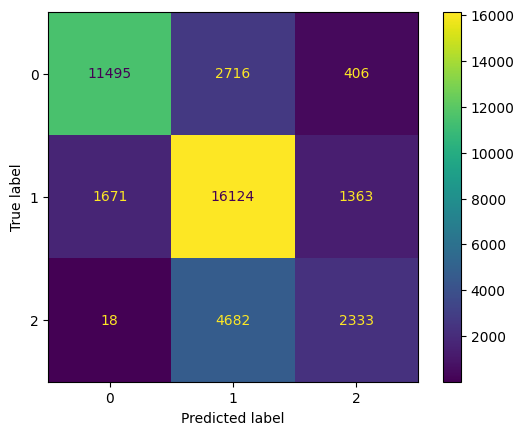

In [ ]:
# Logistic Regression Confusion Matrix
logistic_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, logistic_predictions)
sklearn.metrics.ConfusionMatrixDisplay(logistic_confusion_matrix).plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

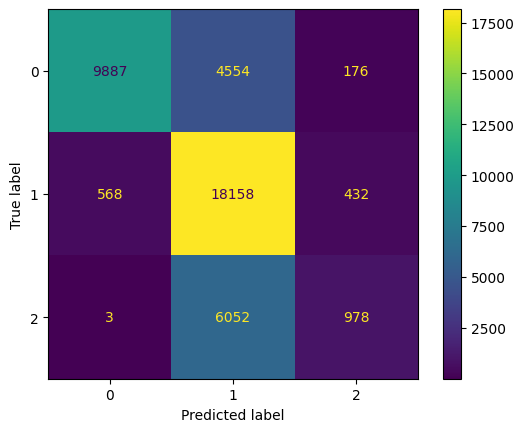

In [ ]:
# Ridge Classifier Confusion Matrix
ridge_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, ridge_predictions)
sklearn.metrics.ConfusionMatrixDisplay(ridge_confusion_matrix).plot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

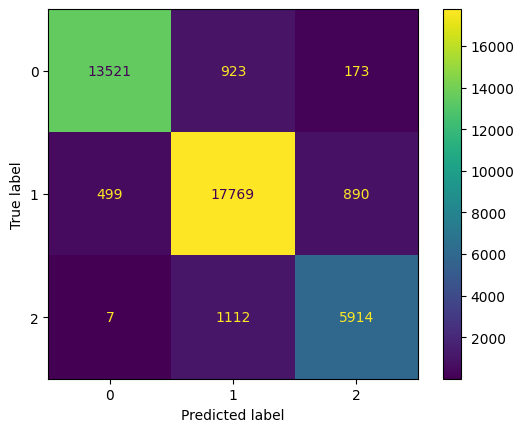

In [ ]:
# Random Forest Classifier Confusion Matrix
forest_confusion_matrix = sklearn.metrics.confusion_matrix(y_test, forest_predictions)
sklearn.metrics.ConfusionMatrixDisplay(forest_confusion_matrix).plot()
plt.show

In [ ]:
gdsc_data.to_csv("gdsc_data_preprocessed.csv", index=False)

X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [ ]:
from google.colab import files

files.download("gdsc_data_preprocessed.csv")

files.download("X_train.csv")
files.download("y_train.csv")
files.download("X_test.csv")
files.download("y_test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>